# Regressão Linear

## Importando bibliotecas

In [1]:
# Importando bibliotecas basicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Regressao linear
from sklearn.linear_model import LinearRegression

# Metricas de avaliaçao
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# importando biblioteca para dividir em train e test
from sklearn.model_selection import train_test_split

## Qualidade da imagem

In [2]:
# definindo a qualidade das imagens
plt.rcParams['figure.dpi'] = 500
plt.rcParams['savefig.dpi'] = 500

## Importando os dados

In [3]:
nomeArquivo = 'dados.xlsx'
# importa o arquivo
df_xlsx = pd.ExcelFile(nomeArquivo, engine='openpyxl')
df = pd.read_excel(df_xlsx)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df['Data'] = pd.to_datetime(df['Data'])
df = df.set_index(['Data'])
# remove NaN values
df = df.dropna()
# retorna df
df.head()

,NA,pluv_mm,PZA
Data,,,
2013-04-05,845.94,0.8,21.87
2013-04-19,846.01,0.0,22.35
2013-05-03,845.79,0.0,22.27
2013-05-17,845.48,0.0,22.14
2013-05-29,845.30,0.0,22.08


## Regressao linear

In [4]:
dfAnalise = pd.DataFrame()
# Copia os dados
dfAnalise['y'] = df['PZA']
# Cria as leituras do instante t-1, t-2 e t-3
dfAnalise['x'] = dfAnalise['y'].shift(1)
dfAnalise = dfAnalise.dropna()
# retorna o df de analise
dfAnalise.head()

,y,x
Data,,
2013-04-19,22.35,21.87
2013-05-03,22.27,22.35
2013-05-17,22.14,22.27
2013-05-29,22.08,22.14
2013-06-14,22.07,22.08


In [5]:
# dividindo o banco em treino e teste
porcentagemTreino = 0.80

porcentagemTeste = 1 - porcentagemTreino
xTreino, xTeste, yTreino, yTeste = train_test_split(dfAnalise['x'],
                                                   dfAnalise['y'],
                                                   test_size = porcentagemTeste,
                                                   random_state=21)
xTreinoReshaped = np.array(xTreino).reshape((-1, 1))
xTesteReshaped = np.array(xTeste).reshape((-1, 1))

In [6]:
# Modelo

# iniciando o modelo
regressaoLinear = LinearRegression()
# realizando a regressao
regressaoLinear.fit(xTreinoReshaped, yTreino)
# coeficiente a e b
a = regressaoLinear.coef_
b = regressaoLinear.intercept_
print(f"a equação da regressão é: {a}*x+{b}")
print('-------------------------------------')
# pontos da regressao
eixoX = [xTreino.min(), xTreino.max()]
eixoY = [xTreino.min()*a+b, xTreino.max()*a+b]

# Avaliando o modelo
# predizendo valores
yTreinoPredito = regressaoLinear.predict(xTreinoReshaped)
yTestePredito = regressaoLinear.predict(xTesteReshaped) 
# Avaliacao dos resultados coeficente de determinacao
coeficienteDeterminacaoTreino = r2_score(yTreino, yTreinoPredito) 
print(f"O coeficiente de determinação do banco de treino é {coeficienteDeterminacaoTreino}")
coeficienteDeterminacaoTeste = r2_score(yTeste, yTestePredito)
print(f"O coeficiente de determinação do banco de teste é {coeficienteDeterminacaoTeste}")
print('-------------------------------------')
# Avaliacao dos resultados RMSE
rmseTreino = mean_squared_error(yTreino,yTreinoPredito,squared=False) 
print(f"O RMSE do banco de treino é {rmseTreino}")
rmseTeste = mean_squared_error(yTeste,yTestePredito,squared=False) 
print(f"O RMSE do banco de teste é {rmseTeste}")
print('-------------------------------------')
# Avaliacao dos resultados MAE
maeTreino = mean_absolute_error(yTreino,yTreinoPredito) 
print(f"O MAE do banco de treino é {maeTreino}")
maeTeste = mean_absolute_error(yTeste,yTestePredito)
print(f"O MAE do banco de teste é {maeTeste}")

a equação da regressão é: [0.98336627]*x+0.346800103426272
-------------------------------------
O coeficiente de determinação do banco de treino é 0.9451497543191758
O coeficiente de determinação do banco de teste é 0.896507177233335
-------------------------------------
O RMSE do banco de treino é 0.15811201929767596
O RMSE do banco de teste é 0.17859525192507053
-------------------------------------
O MAE do banco de treino é 0.10606835124933202
O MAE do banco de teste é 0.10657897882344247


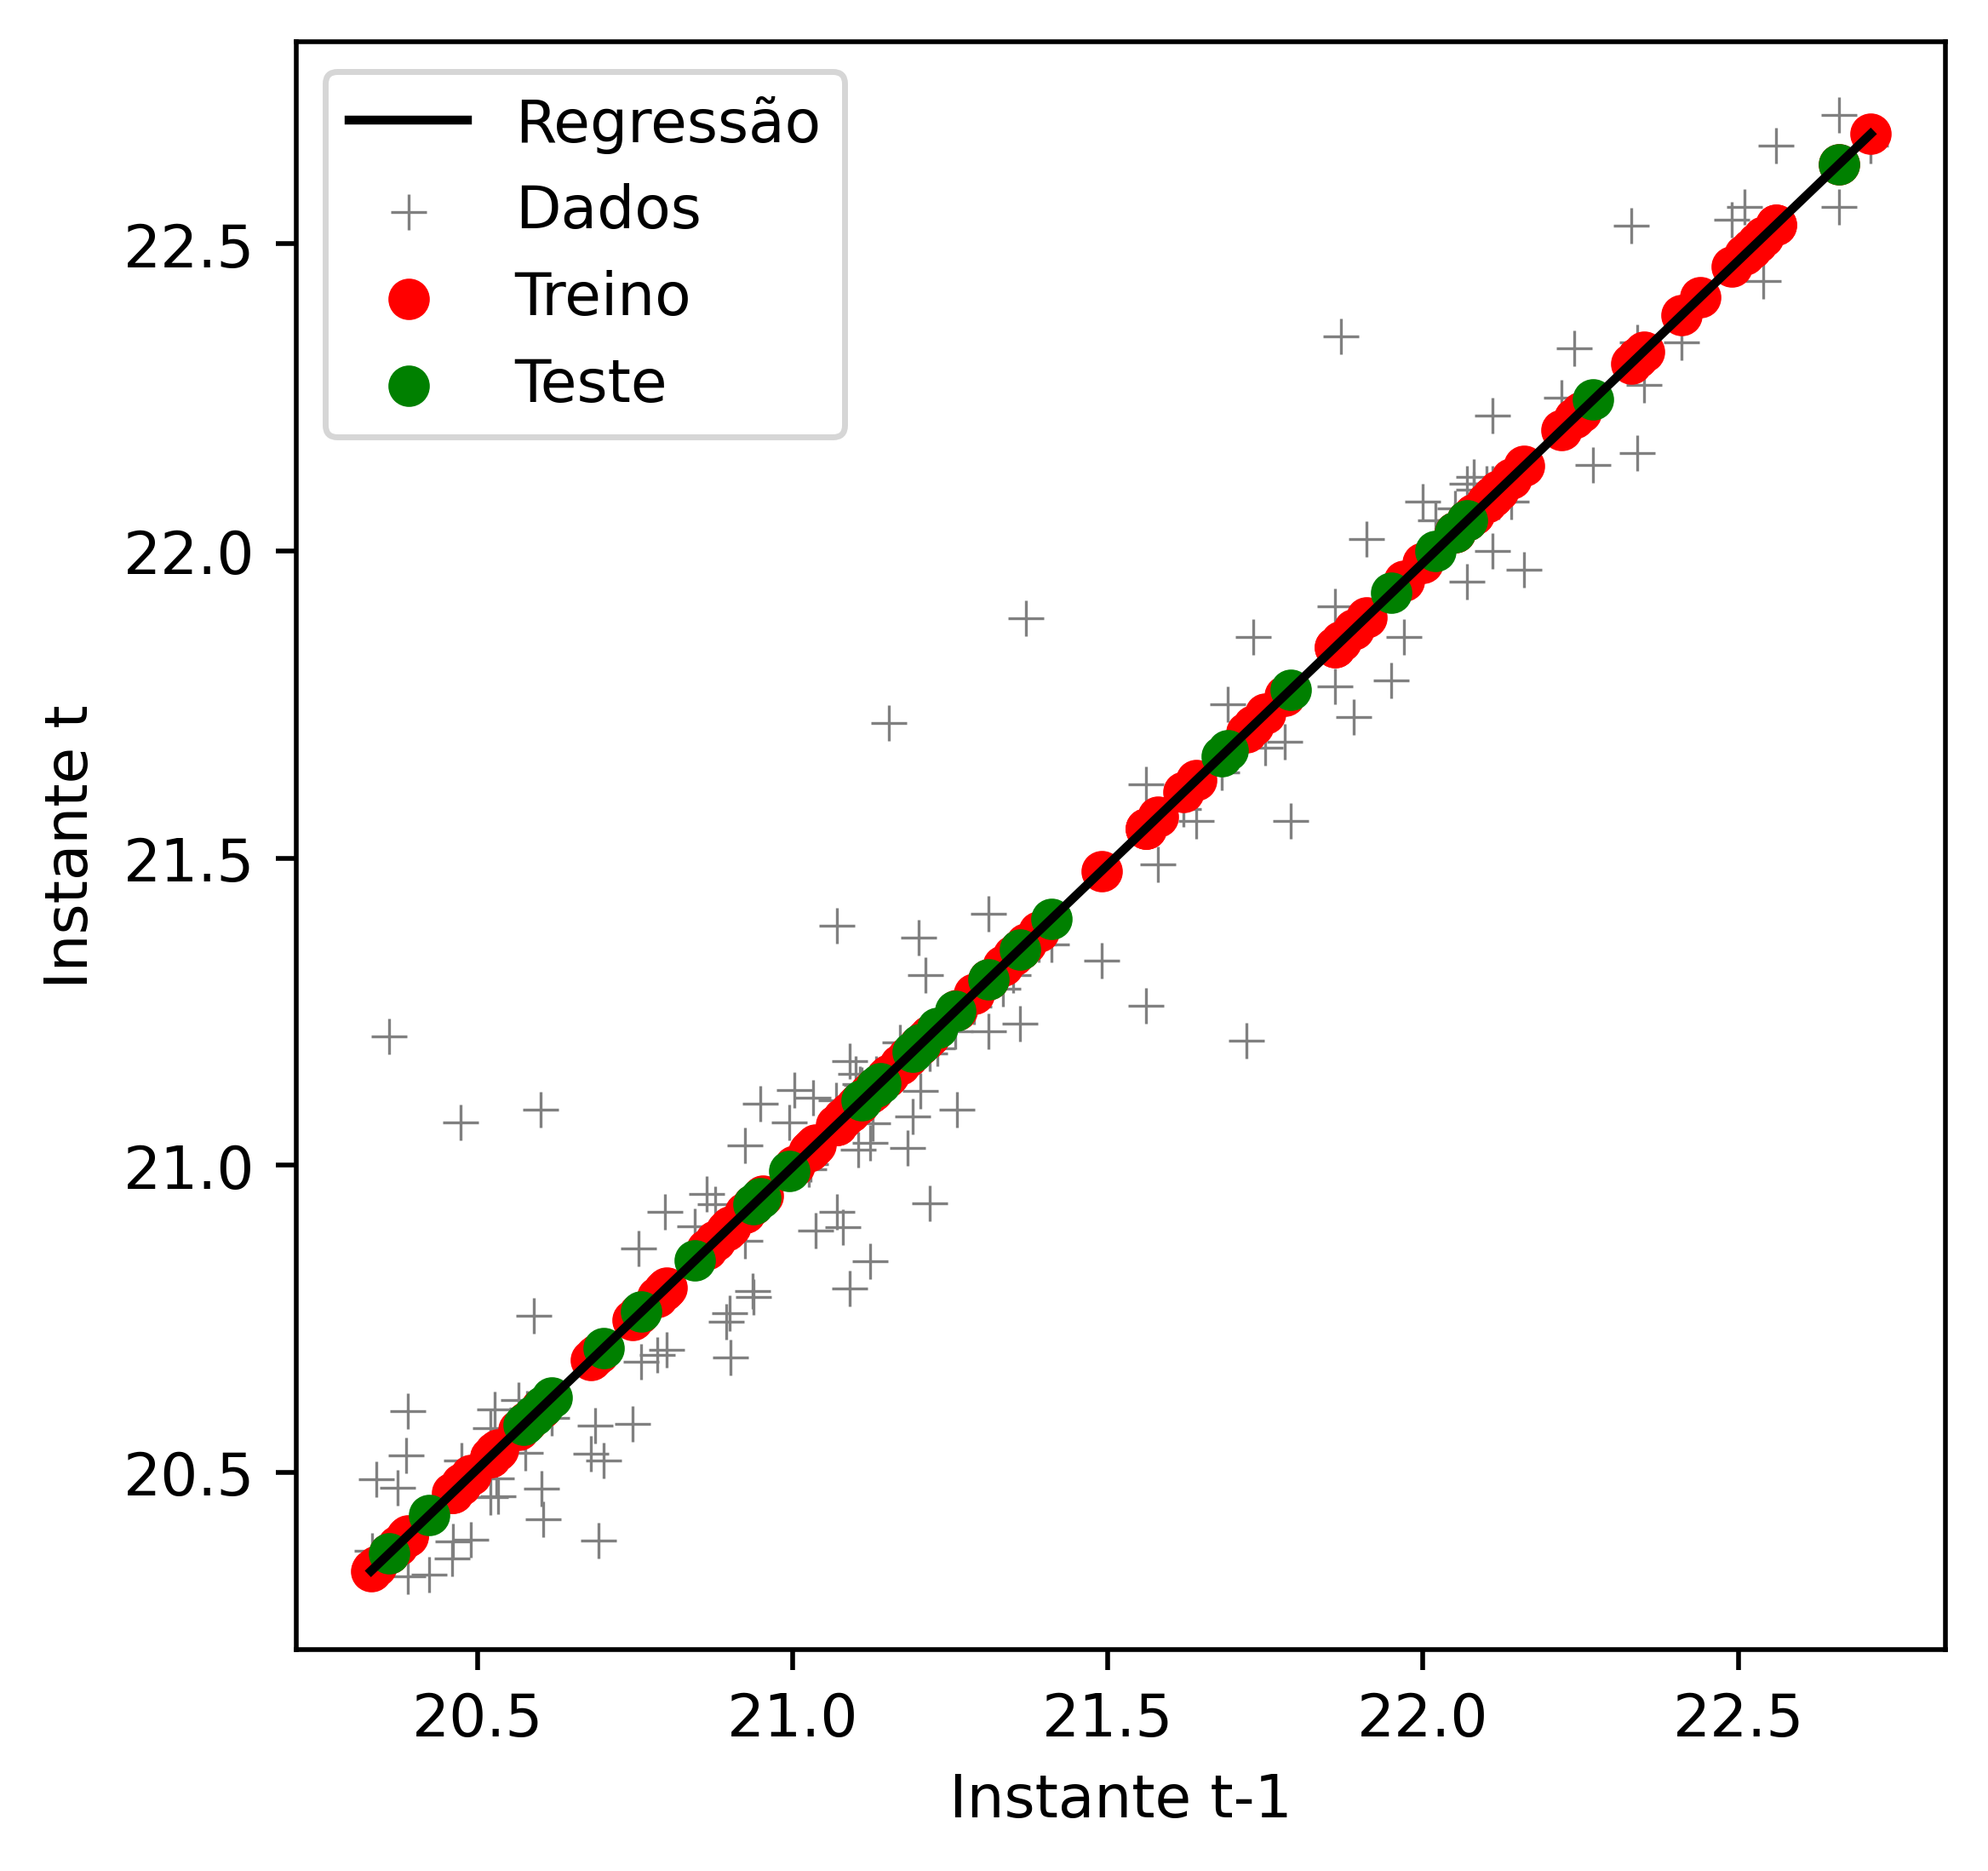

In [7]:
# grafico de autocorrelacao dos instantes t e t-1
fig, ax1 = plt.subplots(figsize = (5, 5))
sns.scatterplot(x='x', y='y', data=dfAnalise, ax=ax1, color='grey', marker='+', label = 'Dados')
ax1.scatter(xTreino, yTreinoPredito, color='red', label = 'Treino')
ax1.scatter(xTeste, yTestePredito, color='green', label = 'Teste')
ax1.plot(eixoX, eixoY, color='black', label = 'Regressão')
ax1.legend()
plt.ylabel('Instante t')
plt.xlabel('Instante t-1');

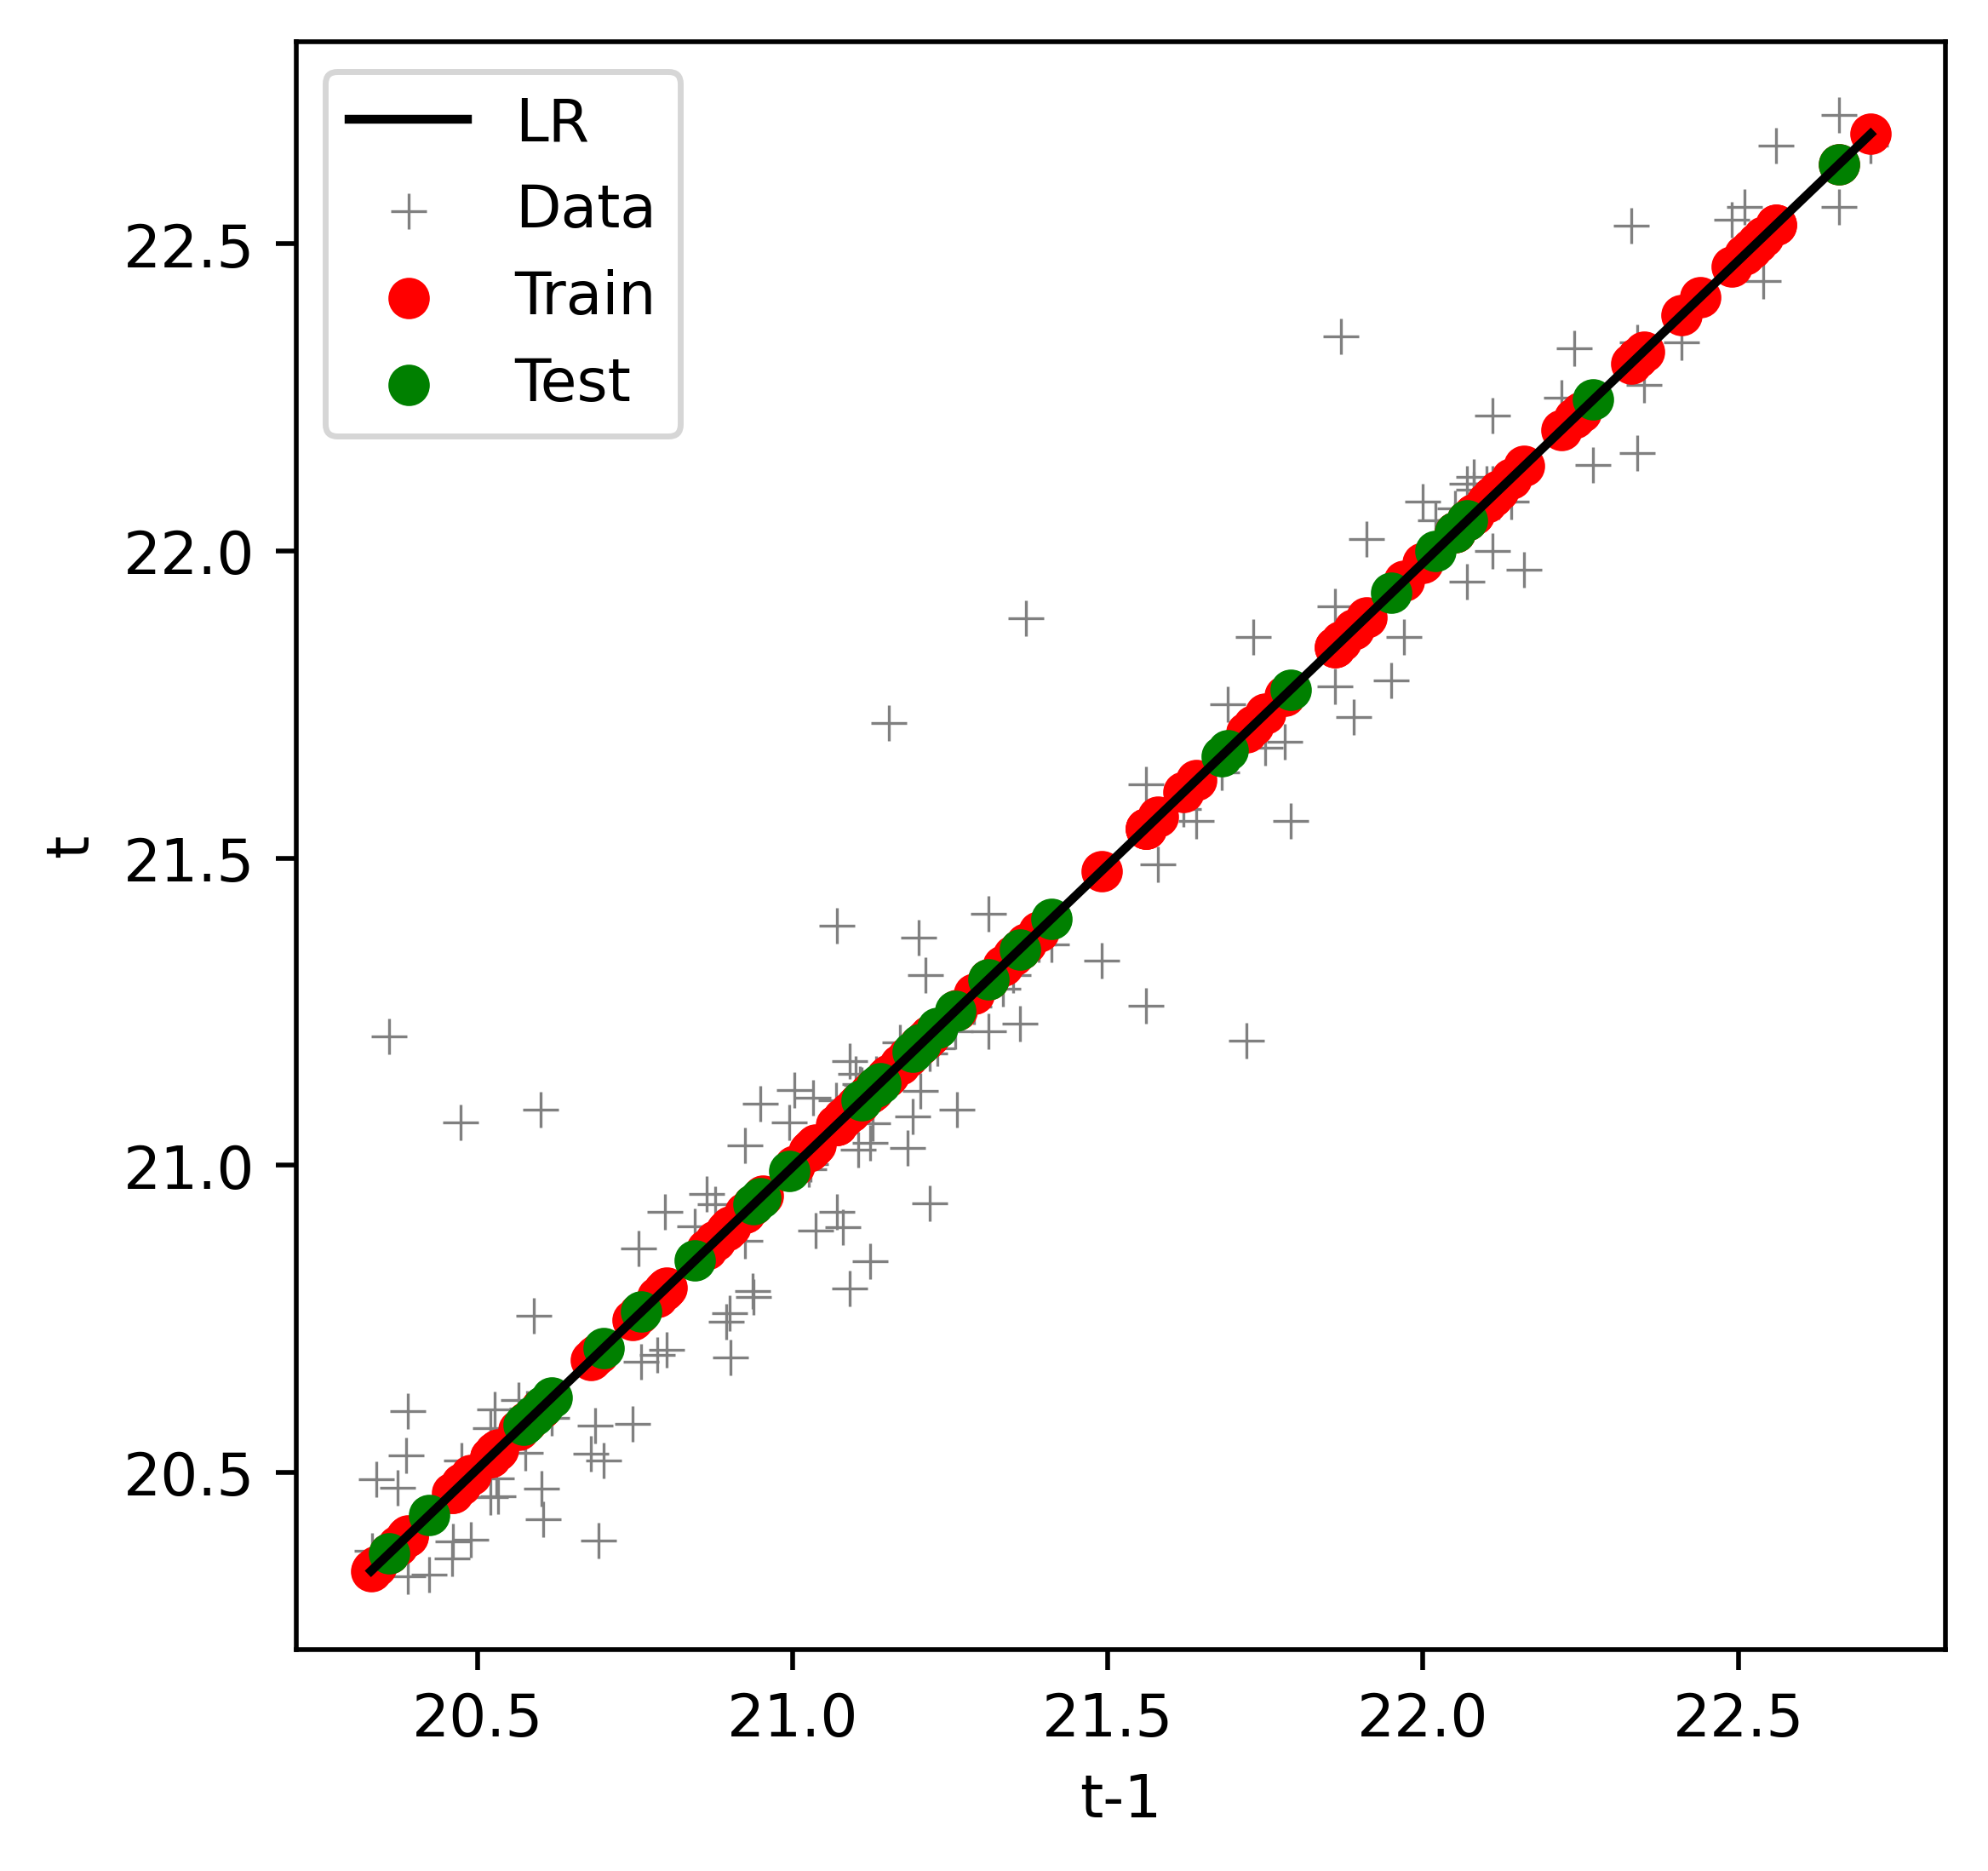

In [11]:
# grafico de autocorrelacao dos instantes t e t-1
fig, ax1 = plt.subplots(figsize = (5, 5))
sns.scatterplot(x='x', y='y', data=dfAnalise, ax=ax1, color='grey', marker='+', label = 'Data')
ax1.scatter(xTreino, yTreinoPredito, color='red', label = 'Train')
ax1.scatter(xTeste, yTestePredito, color='green', label = 'Test')
ax1.plot(eixoX, eixoY, color='black', label = 'LR')
ax1.legend()
plt.ylabel('t')
plt.xlabel('t-1');

In [8]:
# pontos da regressao 80 20
aOitenta = 0.98336627
bOitenta = 0.346800103426272
eixoXOienta = [xTreino.min(), xTreino.max()]
eixoYOitenta = [xTreino.min()*aOitenta+bOitenta, xTreino.max()*aOitenta+bOitenta]

In [9]:
# pontos da regressao 60 40
aSessenta = 0.99466697
bSessenta = 0.0931019823391103
eixoXSessenta = [xTreino.min(), xTreino.max()]
eixoYSessenta = [xTreino.min()*aSessenta+bSessenta, xTreino.max()*aSessenta+bSessenta]

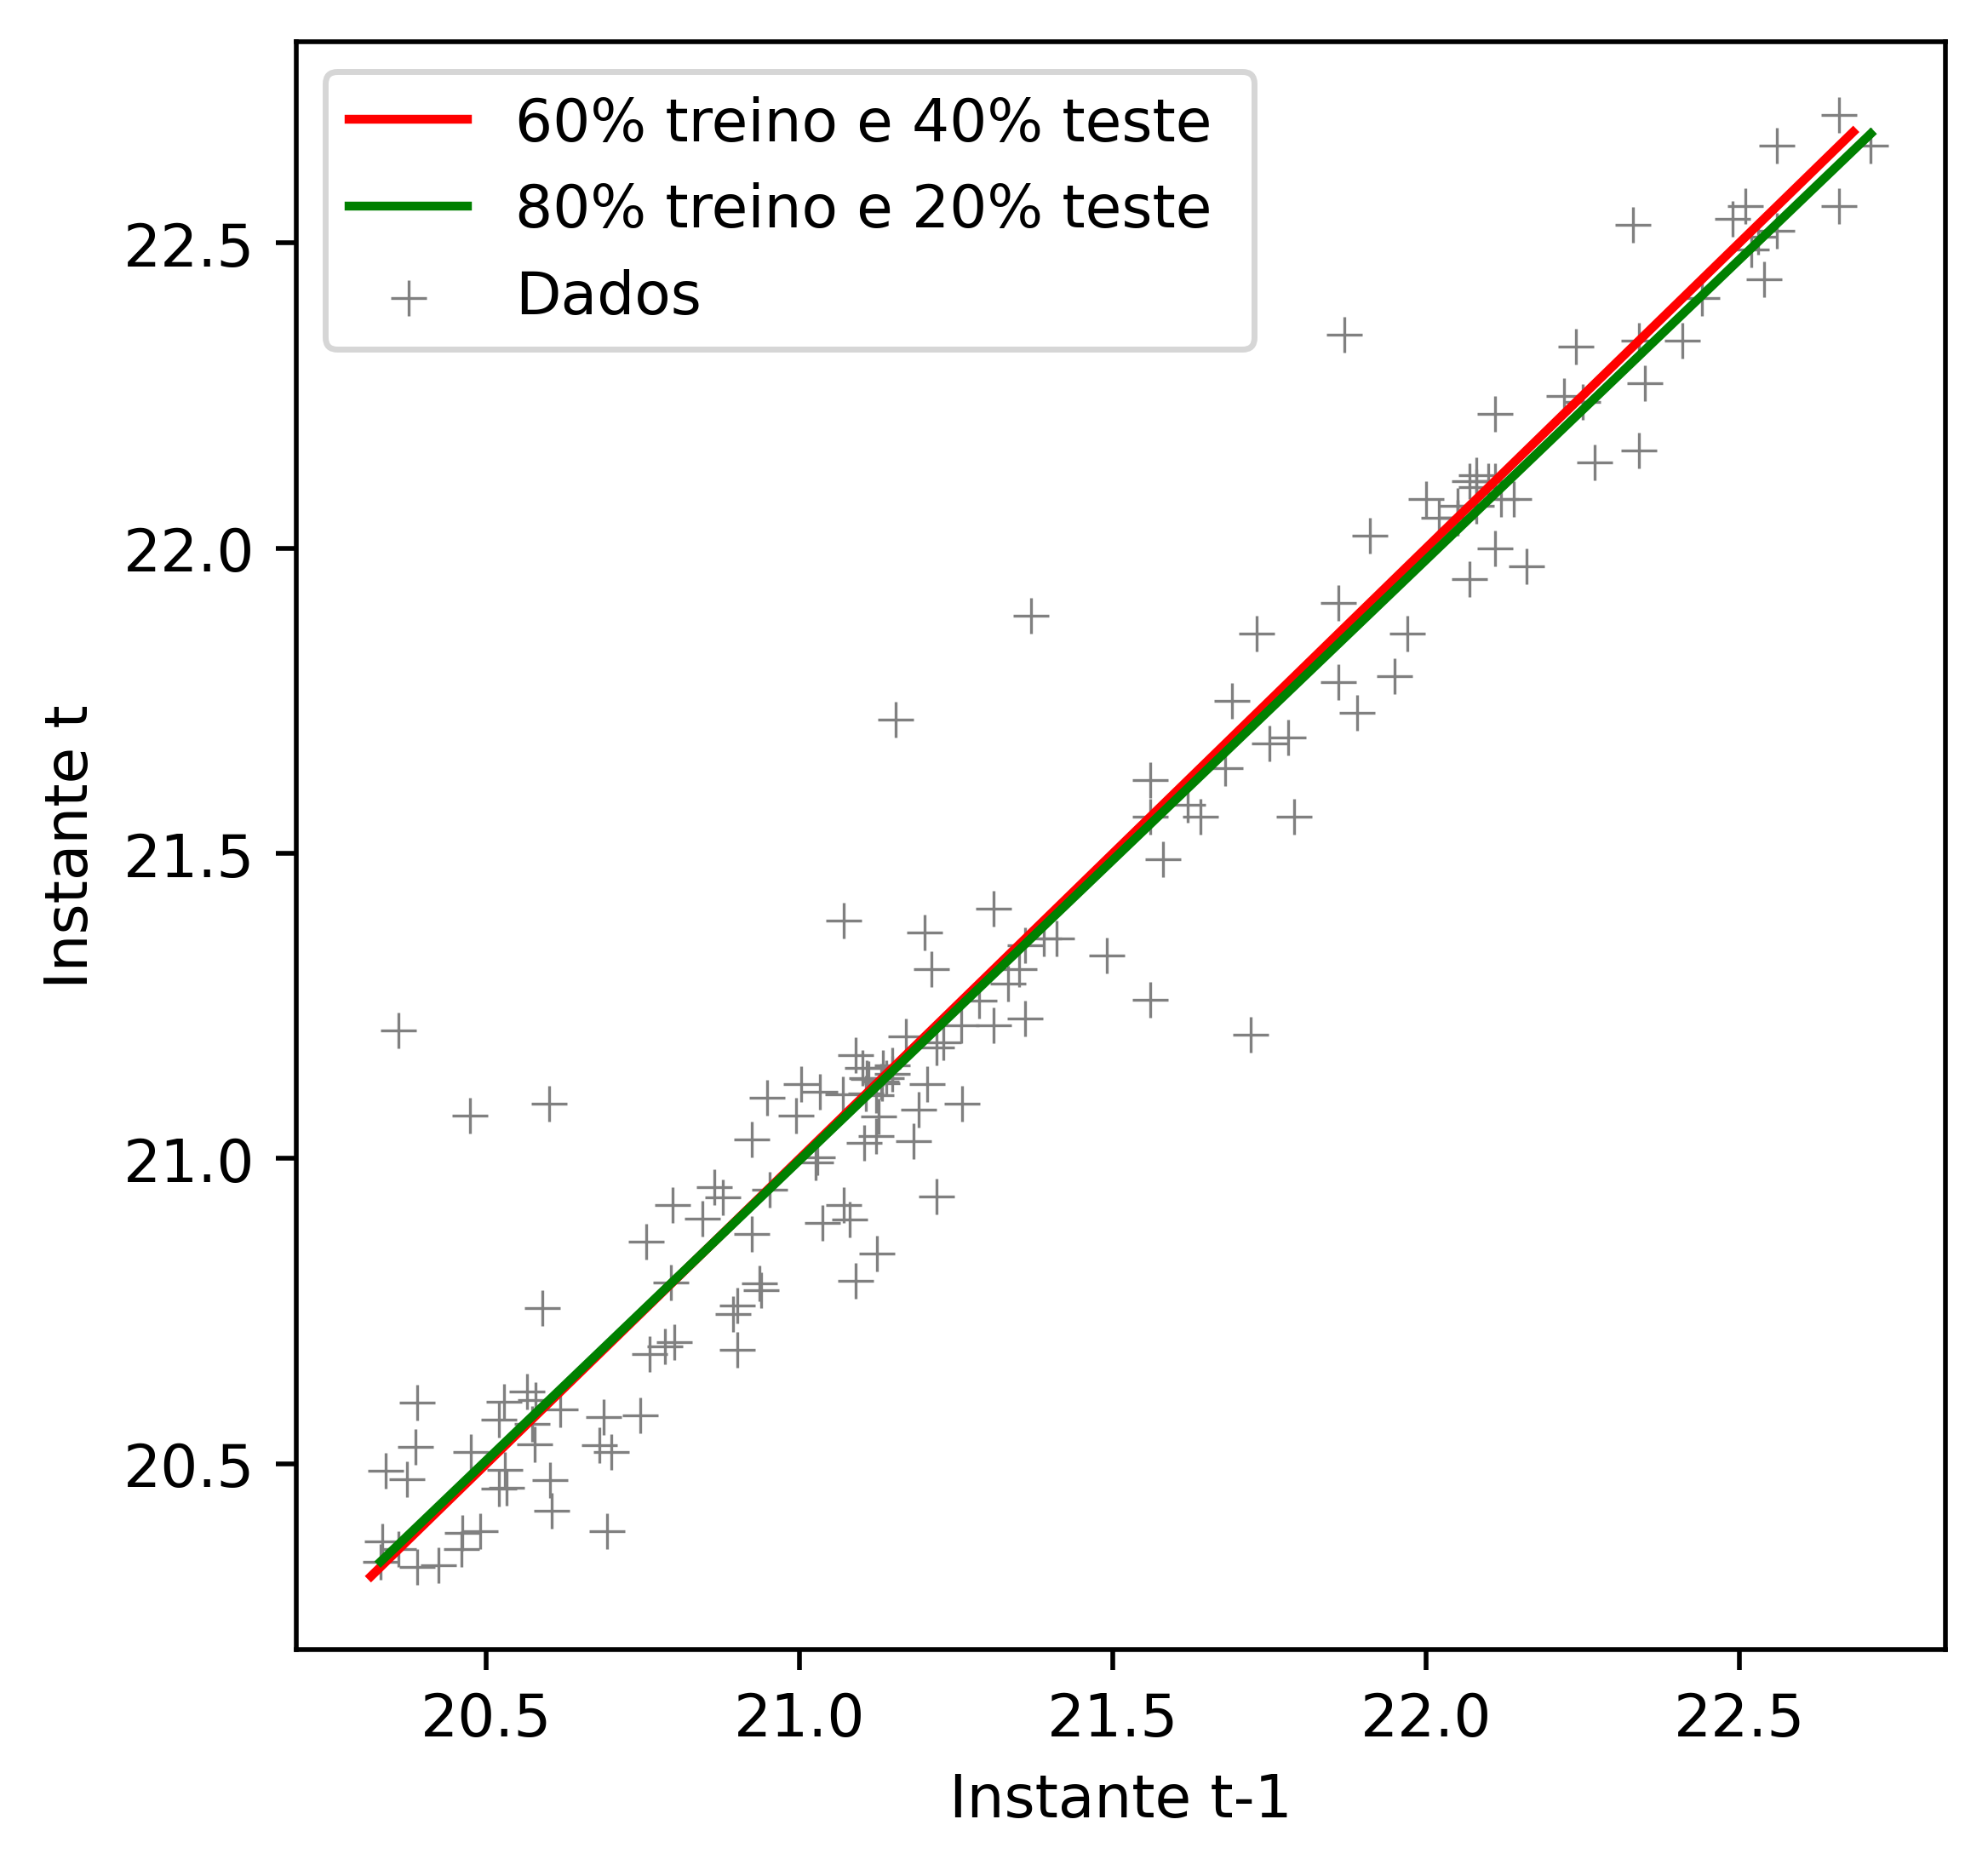

In [10]:
# grafico de autocorrelacao dos instantes t e t-1
fig, ax1 = plt.subplots(figsize = (5, 5))
sns.scatterplot(x='x', y='y', data=dfAnalise, ax=ax1, color='grey', marker='+', label = 'Dados')
ax1.plot(eixoYSessenta, eixoYSessenta, color='red', label = '60% treino e 40% teste ')
ax1.plot(eixoXOienta, eixoYOitenta, color='green', label = '80% treino e 20% teste ')
ax1.legend()
plt.ylabel('Instante t')
plt.xlabel('Instante t-1');